<a href="https://colab.research.google.com/github/nthammadi-uncc/knowledge-discovery-in-databases/blob/main/Preparing_Data_for_Modeling_Churn_Dataset_Naomi_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><h2>Preparing Data for Modeling using Church dataset</h2>

In [1]:
## Author: Naomi Nikita Thammadi
## Date: 9-20-2021
## Description: This notebook is created for HW5: Preparing Data for modeling and completes all these tasks:
## 1. Import necessary modules
## 2. Open churn
## 3. Partition the data set, so that 67% of the records are included in the training data set and
##    33% are included in the test data set 
## 4. Use a bar graph to confirm your proportions
## 5. Identify the total number of records in the training data set and how many records in the
##    training data set have a churn value of true
## 6. Use your answers from the previous exercise to calculate how many true churn records
##    you need to resample in order to have 20% of the rebalanced data set have true churn values
## 7. Perform the rebalancing described in the previous exercise and confirm that 20% of the
##    records in the rebalanced data set have true churn values
## 8. Which baseline model do we use to compare our classification model performance against? 
##    To which value does this baseline model assign all predictions? 
##    What is the accuracy of this baseline model? 
## 9. Validate your partition by testing for the difference in proportion of true churn records
##    for the training set versus the test set
## 10. Create a final markdown that summarizes your results


<h4>TASK 1: Import the necessary modules</h4>

In [2]:
# importing packages
import numpy as np
from scipy.stats import norm
from statistics import stdev
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split

In [3]:
#set random seed
seed=np.random.seed(42)

<h4>Task 2: Load the churn dataset</h4>

In [4]:
#read the churn dataset using the pandas framework
churn=pd.read_csv('data/churn')
churn.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


In [5]:
#use the describe function to describe the dataset
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<h4>Task 3: Partition the dataset into Training(67%) and Testing(33%) datasets</h4>

In [6]:
#divide into train and test sets using train_test_split
X_train, X_test = train_test_split(churn, test_size=0.33, random_state=42)


In [7]:
X_train.shape

(2233, 22)

In [8]:
X_test.shape

(1100, 22)

<h4>Task 4: Use a bar-graph to confirm your proportions</h4>

<AxesSubplot:xlabel='Partition'>

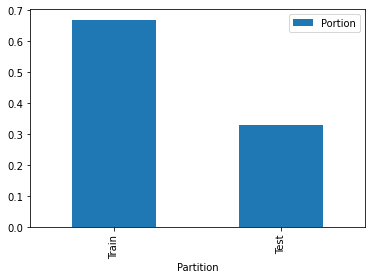

In [9]:
#plot a bar graph of the train and test data sets to check proportions
df = pd.DataFrame({'Partition':['Train', 'Test'],
                   'Portion':[(X_train.shape[0]/churn.shape[0]),
                              (X_test.shape[0]/churn.shape[0])]
                   })
# create barplot
df.set_index('Partition').plot(kind='bar')


<h4>Task 5: Identify the total number of records in training dataset and number of records that have churn value as true</h4>

In [10]:
print('The total number of records in the training dataset is', X_train.shape[0])
print('There are', X_train.loc[X_train['Churn']==True].shape[0], 'records in the training data set that have churn value equal to True')

The total number of records in the training dataset is 2233
There are 323 records in the training data set that have churn value equal to True


In [11]:
#check the % of true churn records in the training set
print('The percentage of records with churn value as true are: ', round((X_train.loc[X_train['Churn']==True].shape[0]/X_train.shape[0])*100,2), '%')

The percentage of records with churn value as true are:  14.46 %


<h4>Task 6: Resample the dataset to have 20% of the rebanced data set to have true churn values</h4>

In [12]:
# create variables needed to compute resampled record size
true_churn_records = X_train.loc[X_train['Churn']==True].shape[0]
total_records = X_train.shape[0]

# determin portion size to ressample
portion_size = (0.2 * total_records - true_churn_records) / 0.8
print('The portion size is ', portion_size)


The portion size is  154.50000000000003


In [13]:
X_train.loc[X_train['Churn']==True].shape[0],X_train.loc[X_train['Churn']==False].shape[0], X_train.shape[0]

(323, 1910, 2233)

<h4>Task 7: Rebalance the train dataset to have 20% of true churn values and confirm it</h4>

In [14]:
# Perform the rebalancing described and confirm that 20% of the records in the rebalanced data set have true churn 

# subset the records to be resampled
to_resample = X_train.loc[X_train['Churn']==True]

# resample the '>50K' records to the determined sample size
our_resample = to_resample.sample(n = round(portion_size), replace = True)

# concatenate the sampled data with the rest of the training data so that it's rebalanced
X_train_rebal = pd.concat([X_train, our_resample])
X_train_rebal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2388 entries, 2360 to 1122
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           2388 non-null   object 
 1   Account Length  2388 non-null   int64  
 2   Area Code       2388 non-null   int64  
 3   Phone           2388 non-null   object 
 4   Intl Plan       2388 non-null   object 
 5   VMail Plan      2388 non-null   object 
 6   VMail Message   2388 non-null   int64  
 7   Day Mins        2388 non-null   float64
 8   Day Calls       2388 non-null   int64  
 9   Day Charge      2388 non-null   float64
 10  Eve Mins        2388 non-null   float64
 11  Eve Calls       2388 non-null   int64  
 12  Eve Charge      2388 non-null   float64
 13  Night Mins      2388 non-null   float64
 14  Night Calls     2388 non-null   int64  
 15  Night Charge    2388 non-null   float64
 16  Intl Mins       2388 non-null   float64
 17  Intl Calls      2388 non-null 

<AxesSubplot:ylabel='Partition'>

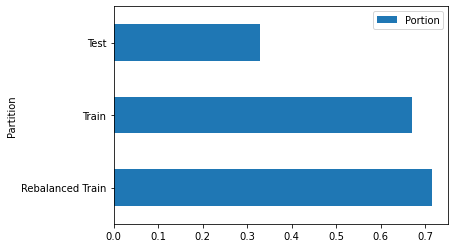

In [15]:
#plot a bar graph of the training rebalanced, train and test data sets to see the difference proportions
df = pd.DataFrame({'Partition':['Rebalanced Train', 'Train','Test'],
                   'Portion':[(X_train_rebal.shape[0]/churn.shape[0]),
                              (X_train.shape[0]/churn.shape[0]), 
                              (X_test.shape[0]/churn.shape[0])]
                   })
# create barplot
df.set_index('Partition').plot(kind='barh')


<h5>Even though the Train rebalanced and Test datasets now make up more than 100% of the initial churn dataset records, it is alright because <br/><u>Test Data sets should never be balanced</u></h5>

In [16]:
# table proportion of churn in training data
proportion_churn = X_train_rebal['Churn'].value_counts() / X_train_rebal.shape[0]
print('Proportion of Churn in rebalanced training data is \n',proportion_churn)

Proportion of Churn in rebalanced training data is 
 False    0.799832
True     0.200168
Name: Churn, dtype: float64


<h5>The Rebalanced Training data set has 20% of true churn records</h5>

<h4>Task 8: Baseline model to compare Classification Performance</h4>

In [17]:
## 8. Which baseline model do we use to compare our classification model performance against? 
##    To which value does this baseline model assign all predictions? 
##    What is the accuracy of this baseline model? 

baseline_value = X_train['Churn'].value_counts() / X_train.shape[0]
print('The baseline is \n',baseline_value)

The baseline is 
 False    0.855352
True     0.144648
Name: Churn, dtype: float64


<h5> The baseline is determined by looking at which Churn value has the greatest proportion of the data which is False.
<h5>If a model were to predict false churn values then the model would have an accuracy of 86% 
<h5>Therefore the selected model would have to outperform this baseline model in order to have any use in the real world. </h5>


<h4>Task 9: Validate your partition by testing for the difference in mean day minutes for the training
set versus the test set</h4>

In [18]:
#get the list of column names
churn.columns.values.tolist()

['State',
 'Account Length',
 'Area Code',
 'Phone',
 'Intl Plan',
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Old Churn',
 'Churn']

In [19]:
# check the mean and std of churn dataset
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [20]:
# check the mean and std of train dataset
X_train.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,100.511867,436.746082,8.069413,180.081326,100.699955,30.614344,201.111688,100.343932,17.094734,200.785132,99.876847,9.035387,10.228034,4.454993,2.762064,1.564263
std,39.901300,42.135476,13.725095,54.477559,20.010022,9.261162,50.697458,20.016748,4.309337,50.981357,19.544787,2.294206,2.787702,2.451659,0.752724,1.326769
min,1.000000,408.000000,0.000000,2.600000,30.000000,0.440000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.700000,88.000000,24.430000,166.500000,87.000000,14.150000,166.700000,86.000000,7.500000,8.500000,3.000000,2.300000,1.000000
50%,99.000000,415.000000,0.000000,179.300000,101.000000,30.480000,201.300000,100.000000,17.110000,201.400000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,19.000000,216.200000,114.000000,36.750000,234.500000,114.000000,19.930000,235.400000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000
max,232.000000,510.000000,50.000000,346.800000,165.000000,58.960000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,18.000000,5.400000,9.000000


In [21]:
# check the mean and std of test dataset
X_test.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,102.187273,438.068182,8.159091,179.153455,99.899091,30.456673,200.713727,99.648182,17.060818,201.048455,100.576364,9.047318,10.256091,4.529091,2.769691,1.560000
std,39.655241,42.851606,13.619526,54.466214,20.186929,9.259238,50.769114,19.731013,4.315238,49.758868,19.617419,2.239209,2.801395,2.480877,0.756213,1.292887
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,31.200000,46.000000,2.650000,43.700000,36.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,415.000000,0.000000,143.650000,86.000000,24.422500,166.675000,86.000000,14.167500,168.475000,87.000000,7.580000,8.500000,3.000000,2.300000,1.000000
50%,103.000000,415.000000,0.000000,180.050000,100.000000,30.610000,201.500000,100.000000,17.130000,200.950000,100.000000,9.045000,10.300000,4.000000,2.780000,1.000000
75%,128.000000,510.000000,20.000000,216.925000,114.000000,36.875000,236.525000,113.000000,20.102500,235.075000,114.000000,10.582500,12.200000,6.000000,3.290000,2.000000
max,243.000000,510.000000,51.000000,350.800000,163.000000,59.640000,341.300000,164.000000,29.010000,367.700000,166.000000,16.550000,18.900000,20.000000,5.100000,9.000000


In [22]:
# Validate your partition by performing a two‐sample Z‐test for the difference in means 
# for the mean Day mins in the training set versus the mean Day mins in the test set

n1 = X_train.shape[0]
x1 = X_train['Day Mins'].mean()
sd1 = stdev(X_train['Day Mins'])

n2 = X_test.shape[0]
x2 = X_test['Day Mins'].mean()
sd2 = stdev(X_test['Day Mins'])

# calculate the denominator pooled standard error
pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)

#calculate z value
z = round(((x1 - x2) - 0) /pooledSE,6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)

print('Z is ',z,'\nP value is ',pval)


Z is  0.462438 
P value is  0.643767


<h5>The Null hypothesis H0 here means that there is <u>no significant difference</u> between the means of Day mins between the train and test data sets
<h5>The Alternative hypothesis Ha here means that there is <u>some difference</u> between the means of Day mins between the train and test data sets
<h5>Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.<br/>
    This means that there is not enough evidence of significant differences between the Day mins in the train and test datasets 
</h5>

<h4>Task 10: Validate your partition by testing for the difference in proportion of true churn records
for the training set versus the test set</h4>

In [23]:
# Validate your partition by performing a two‐sample Z‐test for the difference in proportions 
# for the proportion of true churn records in the training set versus the proportion of true churn records 
# in the test set. 

n1 = X_train.shape[0]
x1 = X_train.loc[X_train['Churn']==True].shape[0]
p1 = x1 / n1

n2 = X_test.shape[0]
x2 = X_test.loc[X_test['Churn']==True].shape[0] 
p2 = x2 / n2

p = (x1+x2)/(n1+n2)

#calculate z value
z = round(((p1-p2)-0)/np.sqrt(p*(1-p)*(1/n1+1/n2)),6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)
print('Z is ',z,'P value is ',pval)



Z is  -0.062165 P value is  0.950431


<h5>The Null hypothesis H0 here means that there is <u>no significant difference</u> between the proportion of True values of churn feature between the train and test data sets
<h5>The Alternative hypothesis Ha here means that there is <u>some difference</u> between the proportion of True values of churn feature between the train and test data sets
<h5>A negative Z-score shows that the proportion of true curn records in the test dataset is slightly higher than that of the train dataset
<h5>Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted.<br/>
This means that there is not evidence of significant difference between the true churn value proportions in the training and test datasets </h5>

<h4>Task 11: Summary of results</h4>

<p>From the above observations, we can say the the accuracy of the baseline model performace to predict false churn values is 86% <br/>
Day mins feature does not have any significant difference of means between the train and test datasets<br/>
Proportion of True churn values between the train and test datasets does not have any significant difference<br/>
For a model to outperform our baseline model, we would need an accuracy of predicting false churn greater than 85%<br/>
Below code shows an example of if we rebalanced the False churn to increase upto 90% and checked the P-value, it would be less than alpha 0.05. In this case we would reject the null hypothesis and accept the alternate hypothesis which states that there is some significant difference in the churn values of the rebalanced training and testing datasets
</p>

In [24]:
# create variables needed to compute resampled record size
false_churn_records = X_train.loc[X_train['Churn']==False].shape[0]
total_records = X_train.shape[0]

# determin portion size to ressample
portion_size = (0.9 * total_records - false_churn_records) / 0.1
print('The portion size is ', portion_size)

# subset the records to be resampled
to_resample = X_train.loc[X_train['Churn']==False]

# resample the '>50K' records to the determined sample size
our_resample = to_resample.sample(n = round(portion_size), replace = True)

# concatenate the sampled data with the rest of the training data so that it's rebalanced
X_train_rebal = pd.concat([X_train, our_resample])
X_train_rebal.info()

# table proportion of churn in training data
proportion_churn = X_train_rebal['Churn'].value_counts() / X_train_rebal.shape[0]
print('Proportion of Churn in rebalanced training data is \n',proportion_churn)

# Validate your rebalanced partition by performing a two‐sample Z‐test for the difference in proportions 
# for the proportion of true churn records in the rebalance training set versus the proportion of true churn records 
# in the test set

n1 = X_train_rebal.shape[0]
x1 = X_train_rebal.loc[X_train_rebal['Churn']==True].shape[0]
p1 = x1 / n1
print(p1)
n2 = X_test.shape[0]
x2 = X_test.loc[X_test['Churn']==True].shape[0] 
p2 = x2 / n2
print(p1)
p = (x1+x2)/(n1+n2)
print(p)
#calculate z value
z = round(((p1-p2)-0)/np.sqrt(p*(1-p)*(1/n1+1/n2)),6)

# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)
print('Z is ',z,'P value is ',pval)


The portion size is  997.0000000000005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3230 entries, 2360 to 814
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3230 non-null   object 
 1   Account Length  3230 non-null   int64  
 2   Area Code       3230 non-null   int64  
 3   Phone           3230 non-null   object 
 4   Intl Plan       3230 non-null   object 
 5   VMail Plan      3230 non-null   object 
 6   VMail Message   3230 non-null   int64  
 7   Day Mins        3230 non-null   float64
 8   Day Calls       3230 non-null   int64  
 9   Day Charge      3230 non-null   float64
 10  Eve Mins        3230 non-null   float64
 11  Eve Calls       3230 non-null   int64  
 12  Eve Charge      3230 non-null   float64
 13  Night Mins      3230 non-null   float64
 14  Night Calls     3230 non-null   int64  
 15  Night Charge    3230 non-null   float64
 16  Intl Mins       3230 non-null   float